<IPython.core.display.Javascript object>


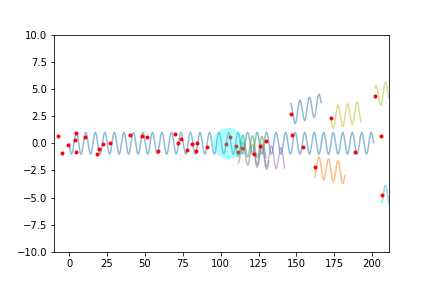

In [9]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

span = 2*np.pi
k = 32

fig, ax = plt.subplots()

x = np.arange(0, span, 0.01)
line1, = ax.plot(x*k, np.sin(x*k), alpha=0.5)

xmin, xmax = ax.get_xlim()

d_lines = [ ax.plot( xmin, 0, alpha=0.5)[0] for i in range(34) ]

ax.set_xlim( xmin, xmax )
ax.set_ylim( -10, 10 )

num_points = 100
px = np.random.uniform(-span*100, 0, num_points)
py = np.random.uniform(-1, 1, num_points)
cx = xmin*.05 + xmax*0.5
cy = 0
points = [ ax.plot(px[i], py[i], 'o', color='red', markersize=3)[0] for i in range(num_points) ]
circle, = ax.plot(cx, cy, 'o', color='cyan', markersize=30, alpha=0.3)

def rotate( th, wx, wy ):
    wx_ = wx - cx
    wy_ = wy - cy
    c = np.cos( th )
    s = np.sin( th )
    return cx + ( wx_*c - wy_* s ), cy + ( wx_*s + wy_* c )

def animate(i):
    dx = i
    x_ = x*k - dx
    line1.set_ydata(np.sin(x_))  # update the data
    temp_lines = []
    for i, point in enumerate(points):
        px_ = px[i] + dx
        if px_ < xmin:
            continue

        pcx = px_ - cx
        if pcx > 0 and i % 3 ==0:
            dy_ = py[i] * pcx * 0.05
            if True:
                j = i // 3
                d_line = d_lines[j]
                wx = np.arange( px_, px_ + 20, 0.01 )
                wy = np.sin(wx)
                th = np.arctan( dy_/pcx )
                wx_, wy_ = rotate( th, wx, wy )
                d_line.set_xdata(wx_)
                d_line.set_ydata( py[i] + wy_)
                temp_lines.append( d_line )
                px_ = cx + pcx*np.cos(th)
        else:
            dy_ = 0
        py_ = py[i] + dy_
        point.set_xdata(px_)
        point.set_ydata(py_)
    return [line1] + points + temp_lines


# Init only required for blitting to give a clean slate.
def init():
    line1.set_ydata(np.ma.array(x, mask=True))
    for i, point in enumerate(points):
        point.set_xdata(np.ma.array(px[i], mask=True))
        point.set_ydata(np.ma.array(py[i], mask=True))
    return [line1] + points

ani = animation.FuncAnimation(fig, animate, np.arange(1, 800), init_func=init,
                              interval=20, blit=True)
plt.show()